### Preparing the Dataset (Tweets extraction)

In [3]:
import re
import twint
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer


# Solve compatibility issues with notebooks and RunTime errors
import nest_asyncio
nest_asyncio.apply()

In [57]:
# Twint configurations to extract Tweets 
c = twint.Config()
c.Search = "vaccine"
c.Store_csv = True
c.Output = "./vaccine_02.csv"
c.Hide_output = True
c.Limit = 5000 
twint.run.Search(c)

In [4]:
# Loading the Tweets Dataset into a Dataframe
tweets_dataset = pd.read_csv("./vaccine_02.csv")

In [5]:
# Checking features/columns
tweets_dataset.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [26]:
tweets = tweets_dataset[["tweet"]]
tweets

,tweet
0,@f_philippot il a surtout atteint le niveau de...
1,"""We have not seen any significant—any data to ..."
2,@WDRBNews Drop mask and vaccine requirements a...
3,"@deepwebghost Also, to be totally fair, they d..."
4,@Ugobernalicis Combien vacciné 🤔
...,...
5003,How Many COVID Vaccine Doses Do Little Kids Ne...
5004,@glamlove23 @walrozt @ItsRenel77 @theysayitsra...
5005,My mom was right these vaccines are fake
5006,100% FACT! The #DefeatedOneTermTwiceImpeachedL...


In [28]:
# Function to clean the Tweets
def clean_tweets(tweets):
    tweets = re.sub("#vaccine", "vaccine", tweets)
    tweets = re.sub("#Vaccine", "Vaccine", tweets)
    tweets = re.sub("#[A-Za-z0-9]+", "", tweets)
    tweets = re.sub("\\n", "", tweets)
    tweets = re.sub("https?:\/\/\S+", "", tweets)
    tweets = re.sub("@[A-Za-z0-9]+", "", tweets)
    return tweets

In [32]:
# Cleaning the Tweets and adding to a DataFrame
tweets_clean = pd.DataFrame(tweets.tweet.apply(clean_tweets))
tweets_clean

,tweet
0,_philippot il a surtout atteint le niveau de l...
1,"""We have not seen any significant—any data to ..."
2,Drop mask and vaccine requirements and there ...
3,"Also, to be totally fair, they did expand une..."
4,Combien vacciné 🤔
...,...
5003,How Many COVID Vaccine Doses Do Little Kids Ne...
5004,Odd that an account with 2 followers and d...
5005,My mom was right these vaccines are fake
5006,100% FACT! The doesn't care about those peopl...


### Model Configuration

In [33]:
# Pre-Trained models provided by Hugging Face
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [34]:
# Function to tokenize each Tweet, and the result of the model
def sentiment_score(tweet):
    tokens = tokenizer.encode(tweet, return_tensors="pt")
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

tweets_clean["sentiment"] = tweets_clean["tweet"].apply(lambda x: sentiment_score(x[:512]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

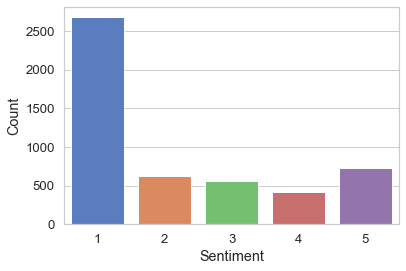

In [35]:
# The scale for the selected model is from 1(negative) to 5(positive)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
sns.countplot(tweets_clean["sentiment"])
plt.xlabel("Sentiment")
plt.ylabel("Count")

##### The Tweets are from the date 02/03/2022 only, which by the results, we can easily see the most impressions are Negative about the term "vaccine".
##### I'm trying to improve the results, with another model (BERTweet) and a Ensemble method to compare other possible models.  
##### If the results demonstrate improvement or considerable difference, I'll update here.